In [1]:
# mlp for regression from here: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ 
from numpy import sqrt
from numpy import loadtxt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# load dataset from csv file
df = read_csv("pv_large.csv", header=None)
#dataset = loadtxt('pv_large.csv', delimiter=',')
feature_names = ['d1', 'd2', 'd3', 'd4', 'eta']


df.columns = feature_names
print(df.head())

df = df.rename(columns={'eta': 'efficiency'})
print(df.describe())


#Split into features and target (Price)
X = df.drop('efficiency', axis = 1)
y = df['efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


#X = dataset[:,0:4]
#y = dataset[:,4]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
#model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

# fit model
history = model.fit(X_train, y_train, validation_split=0.2, epochs =100)




         d1        d2        d3        d4       eta
0  0.516722  0.961115  0.635051  0.179320  0.038308
1  0.128757  0.086377  0.665846  0.742637  0.042062
2  0.298856  0.813094  0.879495  0.815289  0.045109
3  0.242112  0.307903  0.565084  0.527243  0.047246
4  0.015237  0.947674  0.057374  0.371570  0.052374
                 d1            d2            d3            d4    efficiency
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.502822      0.500540      0.494362      0.506232      0.045219
std        0.287561      0.287832      0.287384      0.288513      0.005651
min        0.002592      0.002676      0.002635      0.002616      0.026957
25%        0.255743      0.254376      0.245409      0.252356      0.041461
50%        0.506494      0.499522      0.492234      0.512607      0.044955
75%        0.753436      0.744042      0.741863      0.754634      0.048406
max        0.999940      0.999928      0.999972      0.999820      0.079425
(670

168/168 [==============================] - 0s 858us/step - loss: 3.2288e-05 - mae: 0.0044 - val_loss: 3.2303e-05 - val_mae: 0.0043
Epoch 46/100
168/168 [==============================] - 0s 841us/step - loss: 3.2231e-05 - mae: 0.0043 - val_loss: 3.2163e-05 - val_mae: 0.0043
Epoch 47/100
168/168 [==============================] - 0s 880us/step - loss: 3.2229e-05 - mae: 0.0044 - val_loss: 3.2239e-05 - val_mae: 0.0043
Epoch 48/100
168/168 [==============================] - 0s 814us/step - loss: 3.2253e-05 - mae: 0.0044 - val_loss: 3.2376e-05 - val_mae: 0.0044
Epoch 49/100
168/168 [==============================] - 0s 817us/step - loss: 3.2320e-05 - mae: 0.0044 - val_loss: 3.2251e-05 - val_mae: 0.0043
Epoch 50/100
168/168 [==============================] - 0s 835us/step - loss: 3.2359e-05 - mae: 0.0044 - val_loss: 3.2731e-05 - val_mae: 0.0044
Epoch 51/100
168/168 [==============================] - 0s 826us/step - loss: 3.2399e-05 - mae: 0.0044 - val_loss: 3.2142e-05 - val_mae: 0.0043
Epoch

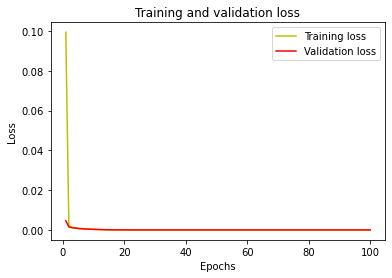

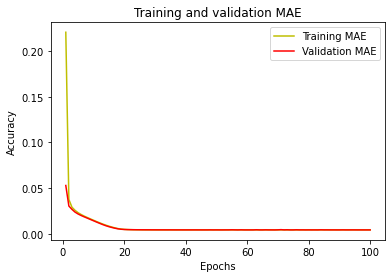

In [2]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:

############################################
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)



Predicted values are:  [[0.04511236]
 [0.04511236]
 [0.04511236]
 [0.04511236]
 [0.04511236]]
Real values are:  2362    0.042422
560     0.048887
4813    0.039813
88      0.042726
1841    0.049830
Name: efficiency, dtype: float64
104/104 [==============================] - 0s 563us/step - loss: 3.1657e-05 - mae: 0.0044
Mean squared error from neural net:  3.1656643841415644e-05
Mean absolute error from neural net:  0.0043641142547130585


In [4]:
######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  3.1637426553413625e-05
Mean absolute error from linear regression:  0.004382353349937263


In [5]:
############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)


Mean squared error using decision tree:  4.528229591437241e-06
Mean absolute error using decision tree:  0.0015040671379613583


In [6]:
##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train, y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Mean squared error using Random Forest:  2.392584161334381e-06
Mean absolute error Using Random Forest:  0.0011122581504532667
d4    0.472156
d2    0.228693
d1    0.195049
d3    0.104102
dtype: float64
